<img src="https://upload.wikimedia.org/wikipedia/en/1/13/DonorsChoose.org_Logo%2C_dark_gray.png" width="400" hover="DonorsChoose, Wikimedia Commons"></img>

# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Check the data</a>  
    - <a href='#41'>Glimpse the data</a>  
    - <a href='#42'>Check missing data</a>  
- <a href='#5'>Data exploration</a>
    - <a href='#51'>Data model</a>
    - <a href='#52'>Donations and donors</a>
    - <a href='#53'>Projects and schools</a>
    - <a href='#54'>Resources</a>
    - <a href='#55'>Teachers</a>   
- <a href='#6'>Data engineering and advanced analysis</a>  
    - <a href='#61'>Project Funding Duration</a> 
    - <a href='#62'>Projects and Donations relationship</a>
- <a href='#7'>Feedback</a>
- <a href='#8'>References</a>




# <a id='1'>Introduction</a>


<a href="https://www.donorschoose.org/">DonnorsChoose.org</a> is an United States nonprofit organization that allows individuals to donnate directly to school classroom projects. 

It was founded in 2000 and announced in January 2018 that has founded over 1 million classroom projects. The organization enables teachers to request materials and resources for their classrooms and makes these project requests available to individual donors through its website. 

Donors can give $1 or more to projects that interest them, which are searchable by school name, teacher name, location, school subject, material, and keywords. 

DonorsChoose.org then purchases necessary supplies and ships them directly to the schools.

DonorsChoose.org, in partnership with Google.org, is inviting the community to help them pair up donors to the classroom requests that will most motivate them to make an additional gift. 




## Method

We will start by analyzing the data (structure, data model, missing data), exploring it extensivelly (separatelly for each dataframe and merged) and then try to understand who, how much and when is donnating for what types of projects, trying to understand the various dimmensions (spatial, temporal and semantic) of correlation between donors, projects, schools and teachers.  For this we introduce few engineered features. 

<a href="#0"><font size="1">Go to top</font></a>

# <a id='2'>Load packages</a>

In [1]:
USE_WORDCLOUD = False
IS_LOCAL = True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
if (USE_WORDCLOUD):
    from wordcloud import WordCloud, STOPWORDS
    from nltk.corpus import stopwords

<a href="#0"><font size="1">Go to top</font></a>

# <a id='3'>Read data</a>

In [2]:
import os
if(IS_LOCAL):
    PATH="../input/donorschoose"
else:
    PATH = "../input"   
print(os.listdir(PATH))

['Donations.csv', 'Donors.csv', 'Projects.csv', 'Resources.csv', 'Schools.csv', 'Teachers.csv']


In [3]:
donations = pd.read_csv(PATH+"/Donations.csv")
donors = pd.read_csv(PATH+"/Donors.csv", low_memory=False)
projects = pd.read_csv(PATH+"/Projects.csv", error_bad_lines=False, warn_bad_lines=False,)
resources = pd.read_csv(PATH+"/Resources.csv", error_bad_lines=False, warn_bad_lines=False)
schools = pd.read_csv(PATH+"/Schools.csv", error_bad_lines=False)
teachers = pd.read_csv(PATH+"/Teachers.csv", error_bad_lines=False)

<a href="#0"><font size="1">Go to top</font></a>

# <a id='4'>Check the data</a>

## <a id='41'>Glimpse the data</a>

In [4]:
print("donations -  rows:",donations.shape[0]," columns:", donations.shape[1])
print("donors -  rows:",donors.shape[0]," columns:", donors.shape[1])
print("projects -  rows:",projects.shape[0]," projects:", projects.shape[1])
print("resources -  rows:",resources.shape[0]," columns:", resources.shape[1])
print("schools -  rows:",schools.shape[0]," columns:", schools.shape[1])
print("teachers -  rows:",teachers.shape[0]," columns:", teachers.shape[1])

donations -  rows: 4687884  columns: 7
donors -  rows: 2122640  columns: 5
projects -  rows: 1110017  projects: 18
resources -  rows: 7210448  columns: 5
schools -  rows: 72993  columns: 9
teachers -  rows: 402900  columns: 3


In the data there are 2.1 millions donors as of April 2018. Totally they made 4.6 millions donations for 1.1 millions projects. There is also data about 72 thousands schools and 402 thousands teachers.

More detailed analysis will be done for each dataframe further.

### donations

In [5]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


### donors

In [6]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


### projects

In [7]:
projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


### resources

In [8]:
resources.head()

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


### schools

In [9]:
schools.head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


### teachers

In [10]:
teachers.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


<a href="#0"><font size="1">Go to top</font></a>

## <a id="42">Check missing data</a>

In [11]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [12]:
missing_data(donations)

,Total,Percent
Donation Received Date,0,0.0
Donor Cart Sequence,0,0.0
Donation Amount,0,0.0
Donation Included Optional Donation,0,0.0
Donor ID,0,0.0
Donation ID,0,0.0
Project ID,0,0.0


In [13]:
missing_data(donors)

,Total,Percent
Donor City,213097,10.039244
Donor Zip,180060,8.482833
Donor Is Teacher,0,0.000000
Donor State,0,0.000000
Donor ID,0,0.000000


In [14]:
missing_data(projects)

,Total,Percent
Project Fully Funded Date,283253,25.517897
Project Resource Category,36,0.003243
Project Subject Subcategory Tree,29,0.002613
Project Subject Category Tree,29,0.002613
Project Expiration Date,14,0.001261
Project Title,6,0.000541
Project Short Description,3,0.000270
Project Need Statement,3,0.000270
Project Essay,1,0.000090
Project Grade Level Category,0,0.000000


In [15]:
missing_data(resources)

,Total,Percent
Resource Vendor Name,81994,1.137155
Resource Unit Price,24310,0.337150
Resource Quantity,24299,0.336997
Resource Item Name,561,0.007780
Project ID,0,0.000000


In [16]:
missing_data(schools)

,Total,Percent
School Percentage Free Lunch,1141,1.563164
School City,227,0.310989
School County,2,0.002740
School District,0,0.000000
School Zip,0,0.000000
School State,0,0.000000
School Metro Type,0,0.000000
School Name,0,0.000000
School ID,0,0.000000


In [17]:
missing_data(teachers)

,Total,Percent
Teacher Prefix,28,0.00695
Teacher First Project Posted Date,0,0.00000
Teacher ID,0,0.00000


There is no missing data in **donations** and only a very small percent of *Teacher Prefix* in **teachers** are missing. 10% of *Donor City*  and 8% from *Donor Zip* is missing from **donors**. 25% of *Project Fully Funded Date* from **projects** are missing. From **schools**, 1.5% of *School Percentage Free Lunch* are missing.

<a href="#0"><font size="1">Go to top</font></a>

# <a id='5'>Data exploration</a>

First we will conduct a data exploration for whole dataset to understand details about the data. Then, we will merge the dataframes using key-foreign key pairs identified when we analyzed the data model.

## <a id="51">Data model</a>

Let's check the data model. The dataframes have one or more *IDs* that can be used as indexes:  

* **donations** : *Donor ID*, *Donation ID* and *Project ID*;  
* **donors** : *Donor ID*;  
* **projects** : *Teacher ID*, *Project ID* and *School ID*;  
* **resources** : *Project ID*;  
* **schools** : *School ID*;  
* **teacher** : *Teacher ID*.  


Donations (unique identifier *Donation ID*) are made by donors (unique identifier *Donor ID*) for projects (unique identifier *Project ID*). Each donor and each project are detailed in **donors** and **projects** dataframes. Details for a project are shown in **resources** dataframe. Each project is initiated by a teacher, identified by *Teacher ID* for a school, identified by *School ID*. In the dataframes **schools** and **teacher** are given the details about the schools and the teachers.


<a href="#0"><font size="1">Go to top</font></a>

## <a id="52">Donations and donors</a>

We merge **donations** with **donors** using the *Donor ID* as key.

In [20]:
donations_donors = donations.merge(donors, on='Donor ID', how='inner')

The resulting dataframe has the following columns:

In [21]:
donations_donors.columns.values

array(['Project ID', 'Donation ID', 'Donor ID',
       'Donation Included Optional Donation', 'Donation Amount',
       'Donor Cart Sequence', 'Donation Received Date', 'Donor City',
       'Donor State', 'Donor Is Teacher', 'Donor Zip'], dtype=object)

### Total number of donations per state

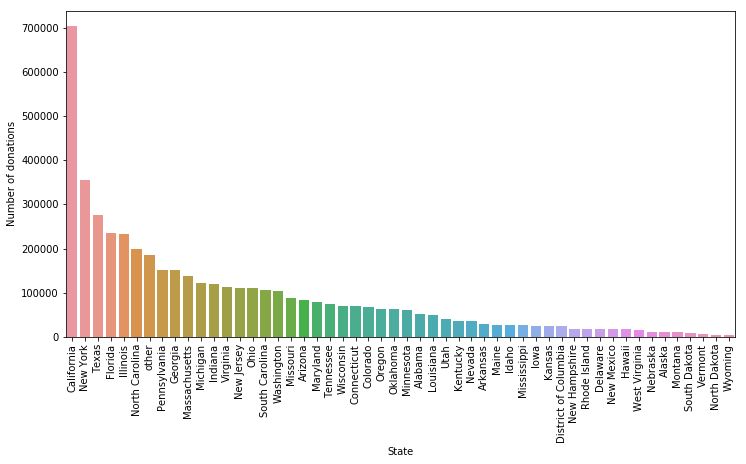

In [22]:
tmp = donations_donors['Donor State'].value_counts()
df1 = pd.DataFrame({'State': tmp.index,'Number of donations': tmp.values})
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.barplot(ax = ax1, x = 'State', y="Number of donations",data=df1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

The maximum number of donations are from California, New York, Texas, Florida, Illinois and North Carolina.

Minimum number of donations are fron Alaska, Montana, South Dakota, Vermont, North Dakota and Wyoming.

### Total sum of donations per state

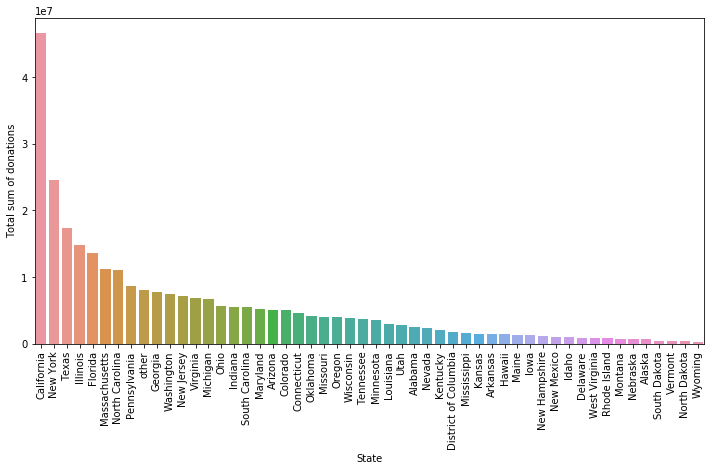

In [23]:
tmp = donations_donors.groupby('Donor State')['Donation Amount'].sum()
df1 = pd.DataFrame({'State': tmp.index,'Total sum of donations': tmp.values})
df1.sort_values(by='Total sum of donations',ascending=False, inplace=True)
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.barplot(ax = ax1, x = 'State', y="Total sum of donations",data=df1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

The maximum total amounts of donations are from California, New York, Texas, Illinois, Florida, Masachusetts and North Carolina.

Minimum total amounts of donations are fronm Nebraska, Alaska, South Dakota, Vermont, North Dakota and Wyoming.

### Top donor cities (number of donations)

Let's see what cities are top donors, in terms of number of donations. We will only show Top 50 cities.

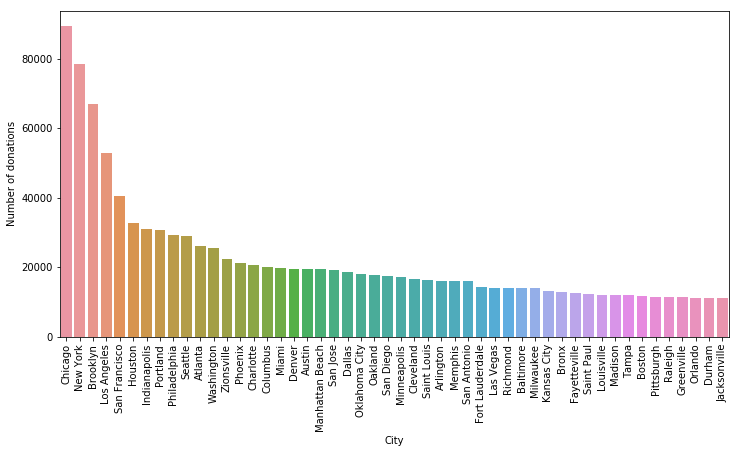

In [24]:
tmp = donations_donors['Donor City'].value_counts().head(50)
df1 = pd.DataFrame({'City': tmp.index,'Number of donations': tmp.values})
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.barplot(ax = ax1, x = 'City', y="Number of donations",data=df1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

Top donor cities are Chicago (Illinois), New York (New York), Brooklin (New York), Los Angeles (California), San Francisco (California) and Houston (Texas).

Let's see now what are the top donor cities in terms on total sum of donations.

### Top donor cities (total amounts of donations)

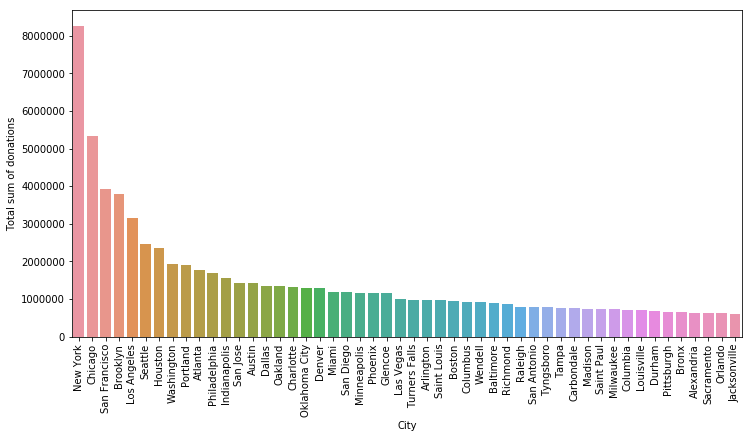

In [25]:
tmp = donations_donors.groupby('Donor City')['Donation Amount'].sum()
df1 = pd.DataFrame({'City': tmp.index,'Total sum of donations': tmp.values})
df1.sort_values(by='Total sum of donations',ascending=False, inplace=True)
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.barplot(ax = ax1, x = 'City', y="Total sum of donations",data=df1.head(50))
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

The cities with maximum sum of donations amount are New York, Chicago, San Francisco, Brooklyn, Los Angeles, Seattle and Huston.

### Bottom donor cities (number of donations)

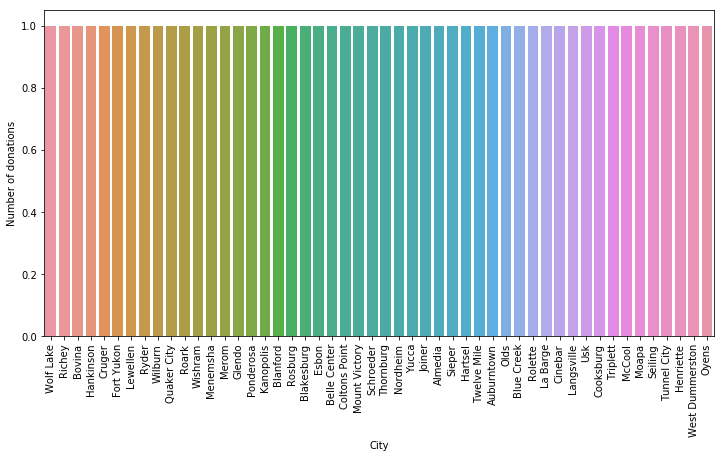

In [26]:
tmp = donations_donors['Donor City'].value_counts().tail(50)
df1 = pd.DataFrame({'City': tmp.index,'Number of donations': tmp.values})
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.barplot(ax = ax1, x = 'City', y="Number of donations",data=df1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

There are at least 50 cities with only one donation over entire time interval.

### Bottom donor cities (total amounts of donations)

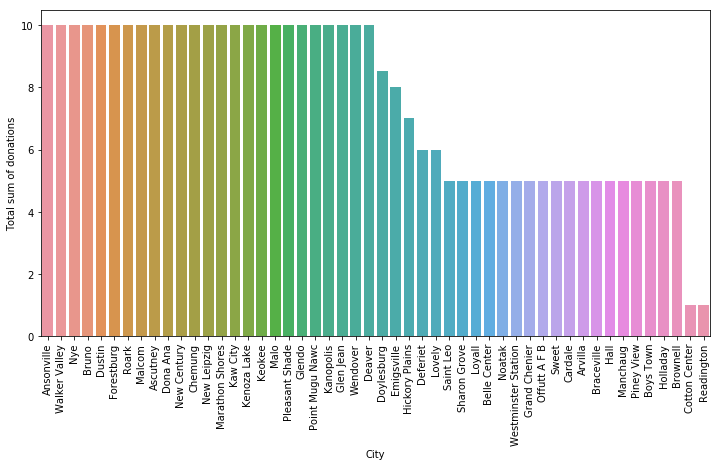

In [27]:
tmp = donations_donors.groupby('Donor City')['Donation Amount'].sum()
df1 = pd.DataFrame({'City': tmp.index,'Total sum of donations': tmp.values})
df1.sort_values(by='Total sum of donations',ascending=False, inplace=True)
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.barplot(ax = ax1, x = 'City', y="Total sum of donations",data=df1.tail(50))
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

There are two cities with amounts of donations of 1 USD (Cotton Center and Readington) and 18 cities with total amount of donations of 5 USD.

Let's check the overall density plot of *Donation Amount*.

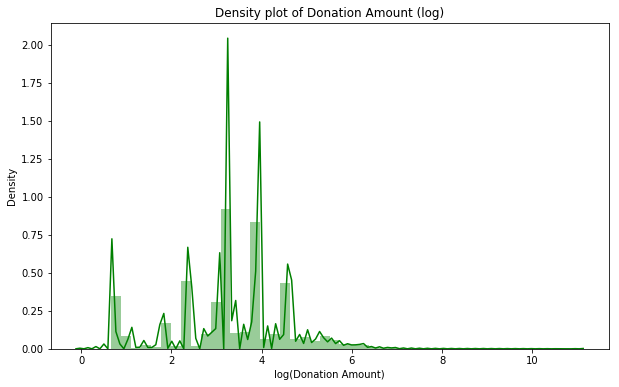

In [28]:
tmp = np.log(donations['Donation Amount'] + 1)
plt.figure(figsize = (10,6))

s = sns.distplot(tmp,color="green")
plt.xlabel('log(Donation Amount)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.title("Density plot of Donation Amount (log)")
plt.show();

### Donor is teacher ?

Some donors are themselves teachers (in the same time we know that every year teachers are paying from their own pocket school materiales). Let's see how many donors for DonorsChoose are teachers, how many donations are by teachers and not teachers and what are the amounts of the donations made by teachers and not teachers.

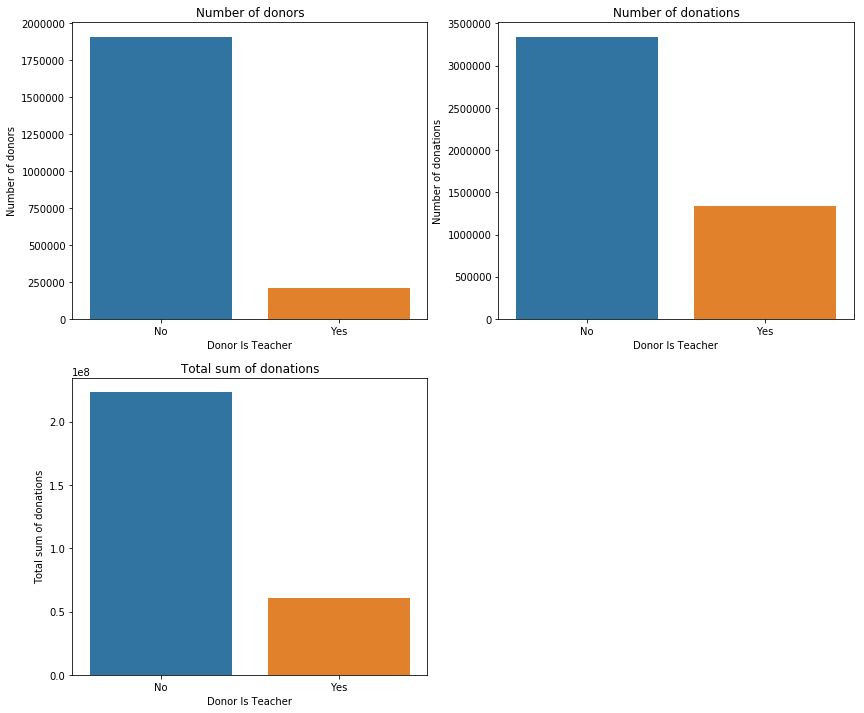

In [29]:

tmp = donors['Donor Is Teacher'].value_counts()
df1 = pd.DataFrame({'Donor Is Teacher': tmp.index,'Number of donors': tmp.values})

tmp = donations_donors['Donor Is Teacher'].value_counts()
df2 = pd.DataFrame({'Donor Is Teacher': tmp.index,'Number of donations': tmp.values})

tmp = donations_donors.groupby('Donor Is Teacher')['Donation Amount'].sum()
df3 = pd.DataFrame({'Donor Is Teacher': tmp.index,'Total sum of donations': tmp.values})


plt.figure(figsize = (14,12))

plt.subplot(2,2,1)
s = sns.barplot(x = 'Donor Is Teacher', y="Number of donors",data=df1)
plt.title("Number of donors")

plt.subplot(2,2,2)
s = sns.barplot(x = 'Donor Is Teacher', y="Number of donations",data=df2)
plt.title("Number of donations")

plt.subplot(2,2,3)
s = sns.barplot(x = 'Donor Is Teacher', y="Total sum of donations",data=df3.tail(50))
plt.title("Total sum of donations")

plt.show();

The number of donors that are teachers is **212285** and the number of the donors that are not teachers is  **1910355** (almost 2 millions). The number of donations made by teachers is **1339221** and the number of donations made by non teachers is **3342679**. The teachers donated an amount of **61** millions USD and the non teachers **223** millions USD.

The teachers are only **10%** of the donors and they made **28%** of the donations amounting for **21%** of the total donations sum. 



### Donations distribution per state and teacher

Let's represent the donation distribution (using boxplot graph), grouped by *Donor State* and by the flag *Donor Is Teacher*.

First, we will store in *state_order* the *Donor States* by the total amount (as are ordered in the previous graph showing total amounts per *Donor States*).

In [30]:
state_order = pd.DataFrame(donations_donors.groupby('Donor State')['Donation Amount'].sum()).\
        sort_values(by='Donation Amount', ascending=False)

We also remove the outliers (*showfliers*=**False**) and separate between donations made by teachers and by non teachers.

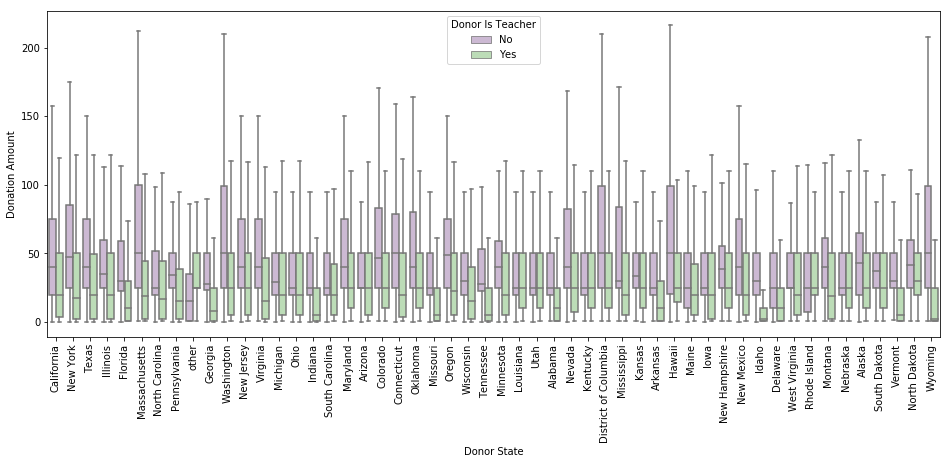

In [31]:
fig, ax1 = plt.subplots(ncols=1, figsize=(16,6))
s = sns.boxplot(ax = ax1, x="Donor State", y="Donation Amount", hue="Donor Is Teacher",
                data=donations_donors, palette="PRGn",showfliers=False, order=state_order.index)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

We see two patterns in the data. Donors that are not teachers tend to donate more (average donation amount for non teachers is allmost all the time over the average for teachers). As well, distribution for donations amount does not look especially different in the states with the highest number of donations and highest total amount (California, New York, Texas, Illinois, Florida) from the states with the lowest number of donations and lowest total amount (Alaska, South Dakota, Vermont, North Dakota, Wyoming). What differentiate is the number of donations.

### Donations variation in time

Let's extract from the *Donation Received Date* the Year, Month, Day, Weekday and Hour.

In [32]:
donations_donors['Donation Received Date'] = pd.to_datetime(donations_donors['Donation Received Date'])
donations_donors['Year'] = donations_donors['Donation Received Date'].dt.year
donations_donors['Month'] = donations_donors['Donation Received Date'].dt.month
donations_donors['Day'] = donations_donors['Donation Received Date'].dt.day
donations_donors['Weekday'] = donations_donors['Donation Received Date'].dt.weekday
donations_donors['Hour'] = donations_donors['Donation Received Date'].dt.hour

Let's show the time variation of the number of donation. We will eliminate the donations in 2018, since the values are only until April.

We represent the sum of donations, the average value of a donation, the min and max values of donations, calculated per Year, Month, Day, Weekday and Hour.

In [33]:
def plot_time_variation(feature):
    tmp = donations_donors.groupby(feature)['Donation Amount'].sum()
    tmp = tmp[~tmp.index.isin([2018])] 
    df1 = pd.DataFrame({feature: tmp.index,'Total sum of donations': tmp.values})
    
    tmp = donations_donors.groupby(feature)['Donation Amount'].mean()
    tmp = tmp[~tmp.index.isin([2018])] 
    df2 = pd.DataFrame({feature: tmp.index,'Mean value of donations': tmp.values})
    
    tmp = donations_donors.groupby(feature)['Donation Amount'].min()
    tmp = tmp[~tmp.index.isin([2018])] 
    df3 = pd.DataFrame({feature: tmp.index,'Min value of donations': tmp.values})
    
    tmp = donations_donors.groupby(feature)['Donation Amount'].max()
    tmp = tmp[~tmp.index.isin([2018])] 
    df4 = pd.DataFrame({feature: tmp.index,'Max value of donations': tmp.values})
    
    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(14,4))
    s = sns.barplot(ax = ax1, x = feature, y="Total sum of donations",data=df1)
    s = sns.barplot(ax = ax2, x = feature, y="Mean value of donations",data=df2)
    plt.show();
    
    fig, (ax3, ax4) = plt.subplots(ncols=2,figsize=(14,4))
    s = sns.barplot(ax = ax3, x = feature, y="Min value of donations",data=df3)
    s = sns.barplot(ax = ax4, x = feature, y="Max value of donations",data=df4)
    plt.show();

def boxplot_time_variation(feature, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature, y="Donation Amount", hue="Donor Is Teacher",
                data=donations_donors, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

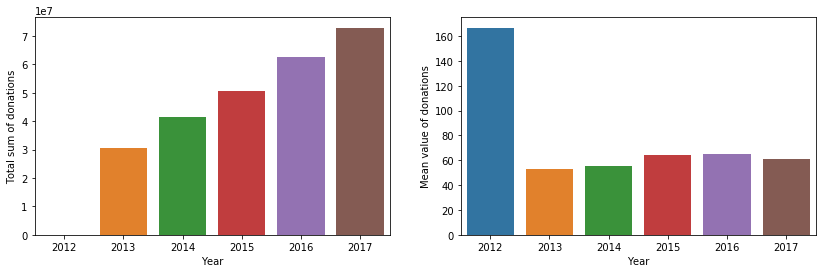

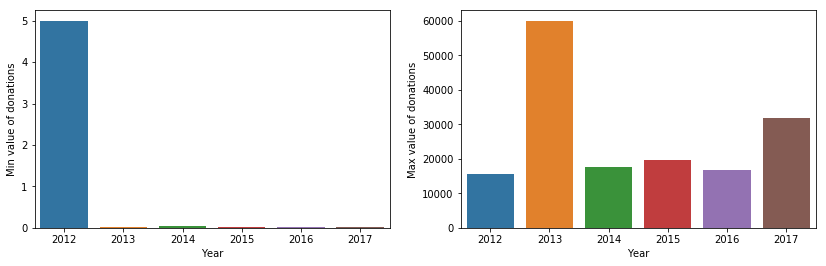

In [34]:
plot_time_variation('Year')

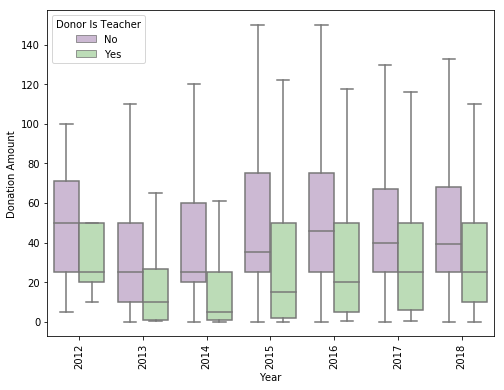

In [35]:
boxplot_time_variation('Year',8)

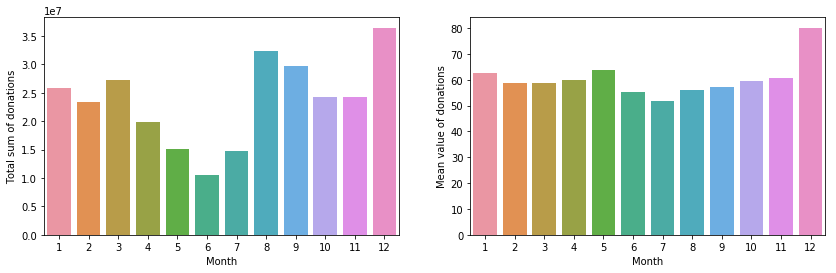

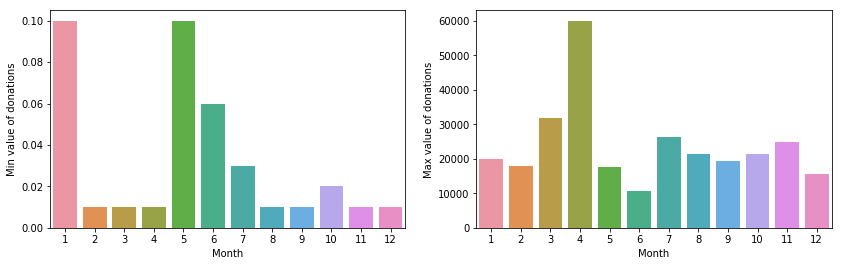

In [36]:
plot_time_variation('Month')

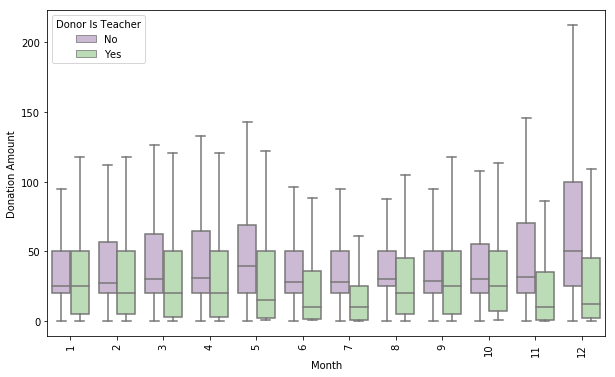

In [37]:
boxplot_time_variation('Month',10)

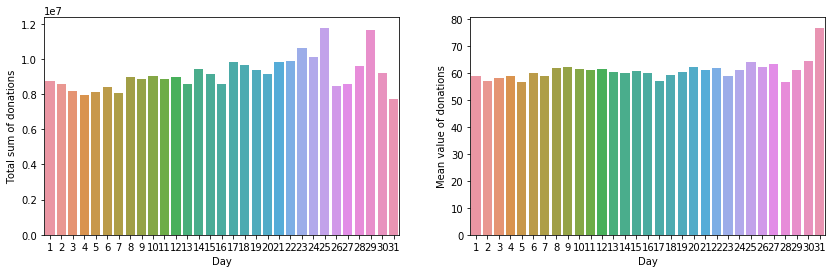

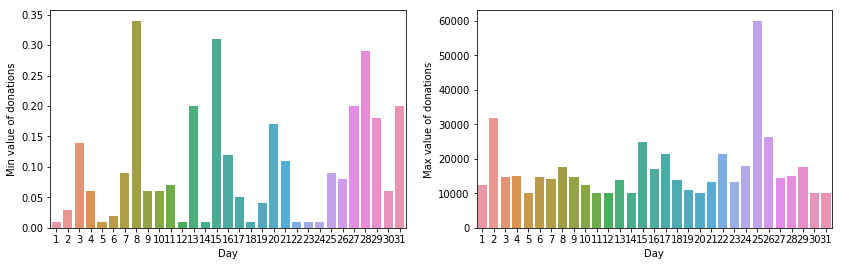

In [38]:
plot_time_variation('Day')

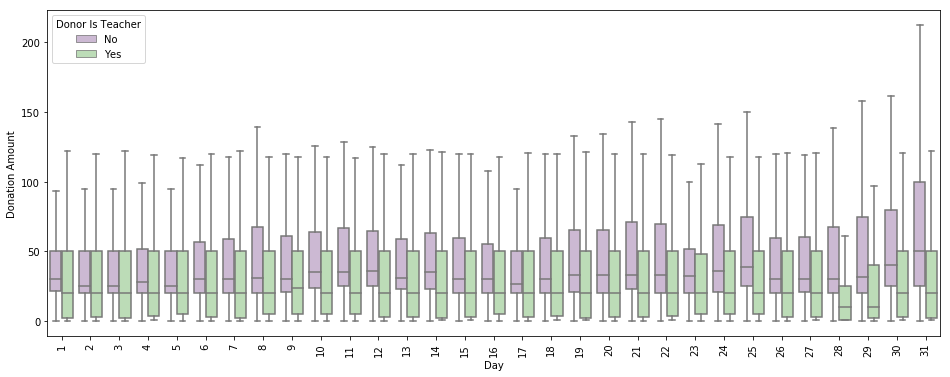

In [39]:
boxplot_time_variation('Day')

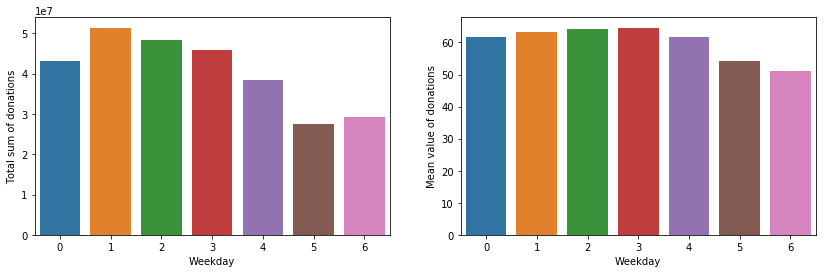

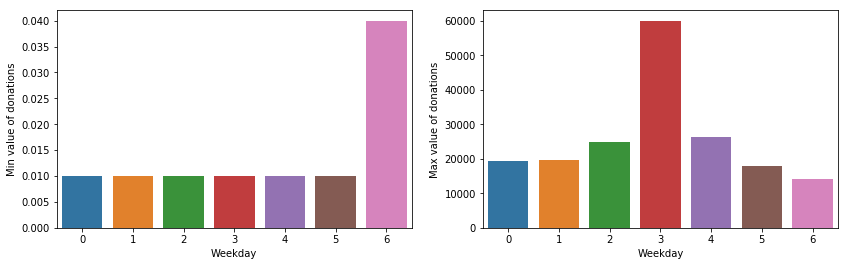

In [40]:
plot_time_variation('Weekday')

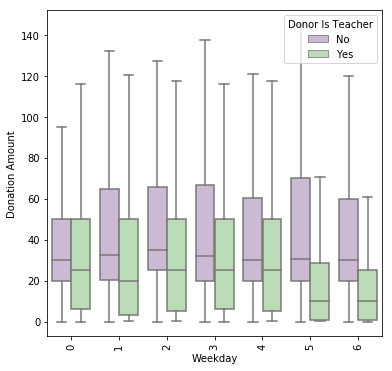

In [41]:
boxplot_time_variation('Weekday',6)

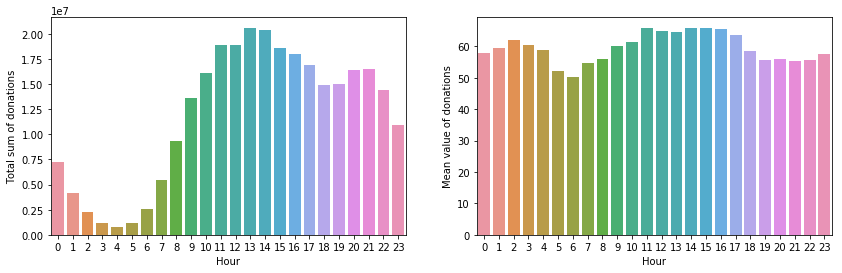

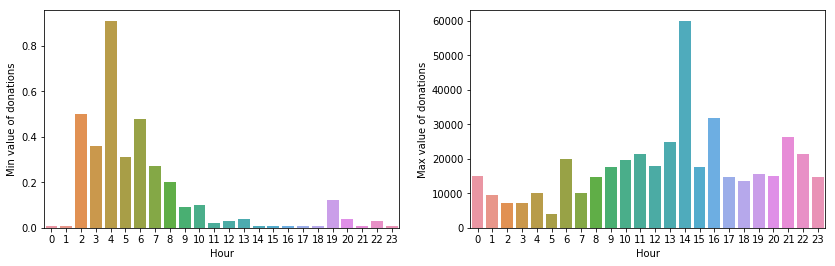

In [42]:
plot_time_variation('Hour')

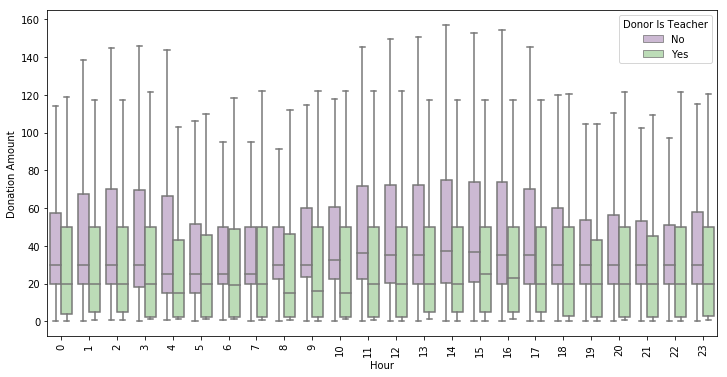

In [43]:
boxplot_time_variation('Hour',12)

The donation with the maximum value was made in 27.12.2016 at 14 pm. The average value of donations is almost constant at approximative 60 USD (and the averages for teacher and non-teacher are around 20 USD and 30-40 USD). With the mean per hour almost constant, the variation of total sum of donations per hour is important, because it shows that there are two peaks of amount of donations per hour, at around 13 and around 12. It is interesting to notice that these valeys and peaks are mostly influenced by non-teacher donations variations around that hours. Also, during the year, there are two peaks, in March and August-September and a low point in June. 

<a href="#0"><font size="1">Go to top</font></a>

## <a id="53">Projects and schools</a>

In [44]:
projects_schools = projects.merge(schools, on='School ID', how='inner')

In [45]:
projects_schools.columns.values

array(['Project ID', 'School ID', 'Teacher ID',
       'Teacher Project Posted Sequence', 'Project Type', 'Project Title',
       'Project Essay', 'Project Short Description',
       'Project Need Statement', 'Project Subject Category Tree',
       'Project Subject Subcategory Tree', 'Project Grade Level Category',
       'Project Resource Category', 'Project Cost', 'Project Posted Date',
       'Project Expiration Date', 'Project Current Status',
       'Project Fully Funded Date', 'School Name', 'School Metro Type',
       'School Percentage Free Lunch', 'School State', 'School Zip',
       'School City', 'School County', 'School District'], dtype=object)

### Number of projects per state

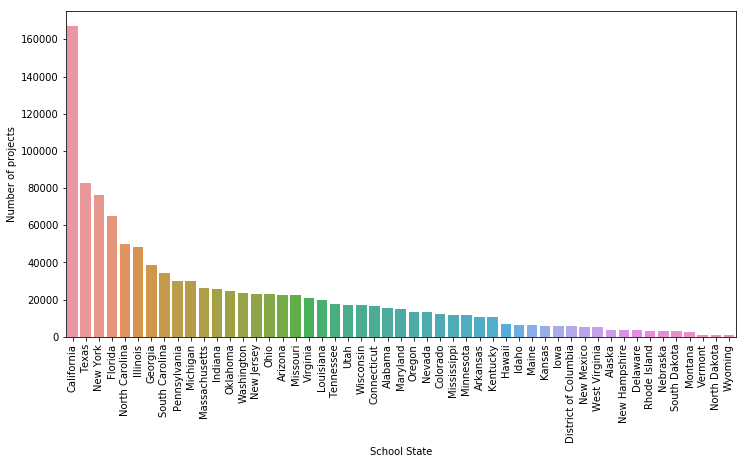

In [46]:
tmp = projects_schools['School State'].value_counts()
df1 = pd.DataFrame({'School State': tmp.index,'Number of projects': tmp.values})
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.barplot(ax = ax1, x = 'School State', y="Number of projects",data=df1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

Most of the projects are started in schools from California, followed by Texas, New York, Florida and North Carolina. Schools in Nebraska, South Dakota, Montana, Vermont, North Dakota and Wyoming starts least number of projects.

### Amount of project cost per state


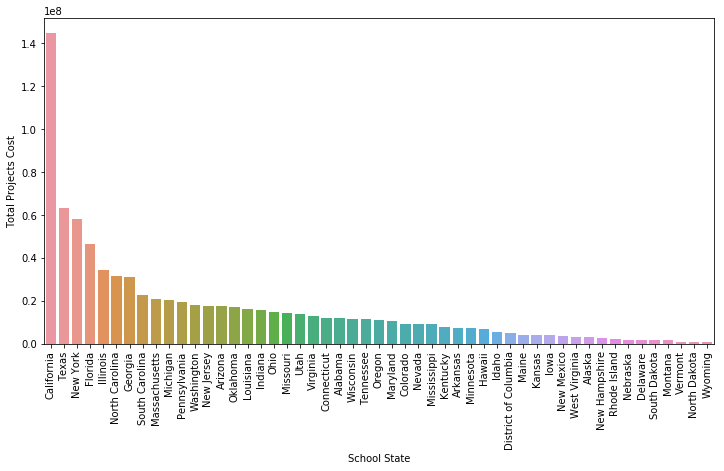

In [47]:
tmp = projects_schools.groupby('School State')['Project Cost'].sum()
df1 = pd.DataFrame({'School State': tmp.index,'Total Projects Cost': tmp.values})
df1.sort_values(by='Total Projects Cost',ascending=False, inplace=True)
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.barplot(ax = ax1, x = 'School State', y="Total Projects Cost",data=df1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

California leads with the highest cumulated projects costs, followed by Texas, New York, Florida, Illinois, North Carolina and Georgia. The states with lowest cumulated projects costs are Delaware, South Dakota, Montana, Vermont, North Dakota and Wyoming.

### Projects costs time variation

Let's extract from *Project Posted Date* the Year, Month, Day, Weekday and Hour.

In [48]:
projects_schools['Project Posted Date'] = pd.to_datetime(projects_schools['Project Posted Date'])
projects_schools['Year Posted'] = projects_schools['Project Posted Date'].dt.year
projects_schools['Month Posted'] = projects_schools['Project Posted Date'].dt.month
projects_schools['Day Posted'] = projects_schools['Project Posted Date'].dt.day
projects_schools['Weekday Posted'] = projects_schools['Project Posted Date'].dt.weekday
projects_schools['Hour Posted'] = projects_schools['Project Posted Date'].dt.hour

Let's also extract from *Project Fully Funded Date* the Year, Month, Day, Weekday and Hour.

In [49]:
projects_schools['Project Fully Funded Date'] = pd.to_datetime(projects_schools['Project Fully Funded Date'])
projects_schools['Year Funded'] = projects_schools['Project Fully Funded Date'].dt.year
projects_schools['Month Funded'] = projects_schools['Project Fully Funded Date'].dt.month
projects_schools['Day Funded'] = projects_schools['Project Fully Funded Date'].dt.day
projects_schools['Weekday Funded'] = projects_schools['Project Fully Funded Date'].dt.weekday
projects_schools['Hour Funded'] = projects_schools['Project Fully Funded Date'].dt.hour

In [50]:
def plot_project_time_variation(feature):
    tmp = projects_schools.groupby(feature)['Project Cost'].sum()
    tmp = tmp[~tmp.index.isin([2018])] 
    df1 = pd.DataFrame({feature: tmp.index,'Total sum of projects cost': tmp.values})
    
    tmp = projects_schools.groupby(feature)['Project Cost'].mean()
    tmp = tmp[~tmp.index.isin([2018])] 
    df2 = pd.DataFrame({feature: tmp.index,'Mean value of projects cost': tmp.values})
    
    tmp = projects_schools.groupby(feature)['Project Cost'].min()
    tmp = tmp[~tmp.index.isin([2018])] 
    df3 = pd.DataFrame({feature: tmp.index,'Min value of projects cost': tmp.values})
    
    tmp = projects_schools.groupby(feature)['Project Cost'].max()
    tmp = tmp[~tmp.index.isin([2018])] 
    df4 = pd.DataFrame({feature: tmp.index,'Max value of projects cost': tmp.values})
    
    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(14,4))
    s = sns.barplot(ax = ax1, x = feature, y="Total sum of projects cost",data=df1)
    s = sns.barplot(ax = ax2, x = feature, y="Mean value of projects cost",data=df2)
    plt.show();
    
    fig, (ax3, ax4) = plt.subplots(ncols=2,figsize=(14,4))
    s = sns.barplot(ax = ax3, x = feature, y="Min value of projects cost",data=df3)
    s = sns.barplot(ax = ax4, x = feature, y="Max value of projects cost",data=df4)
    plt.show();
    
def boxplot_project_time_variation(feature,width=8):
    fig, ax1 = plt.subplots(ncols=1, figsize=(2*width,6))
    s = sns.boxplot(ax = ax1, x=feature, y="Project Cost",data=projects_schools, palette="viridis",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

#### Project Posted Date time variation

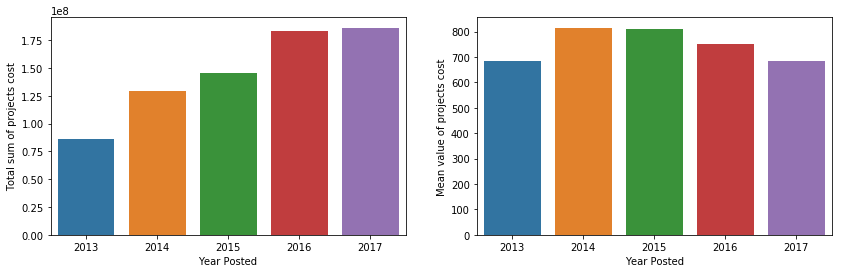

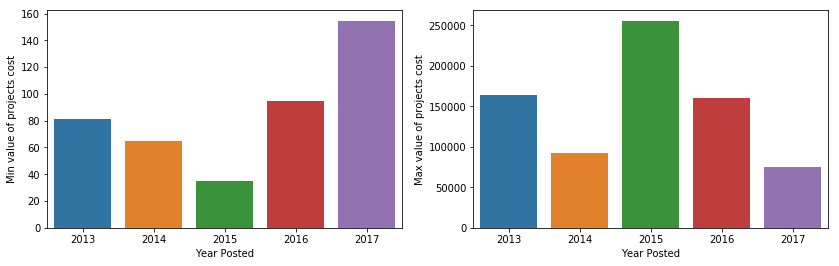

In [51]:
plot_project_time_variation('Year Posted')

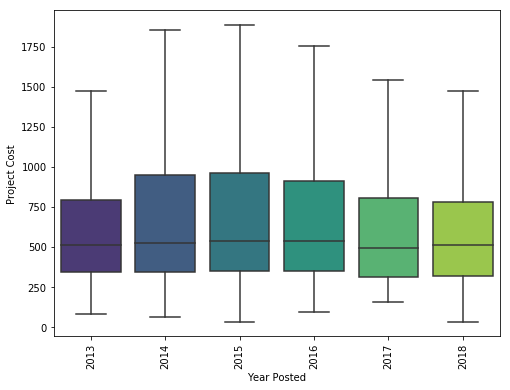

In [52]:
boxplot_project_time_variation('Year Posted',4)

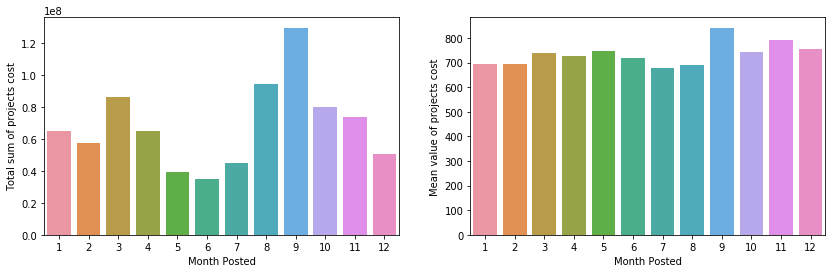

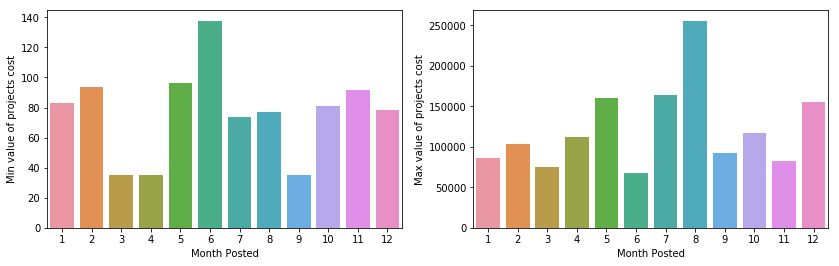

In [53]:
plot_project_time_variation('Month Posted')

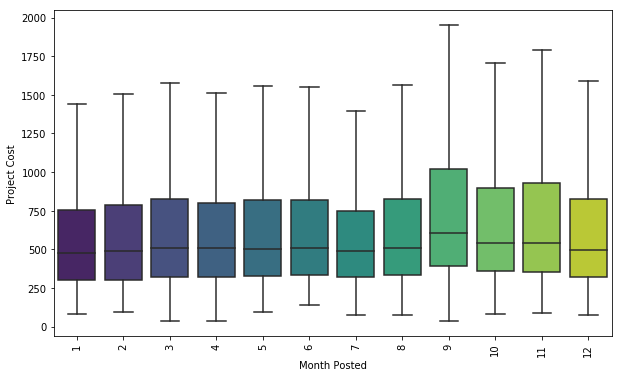

In [54]:
boxplot_project_time_variation('Month Posted',5)

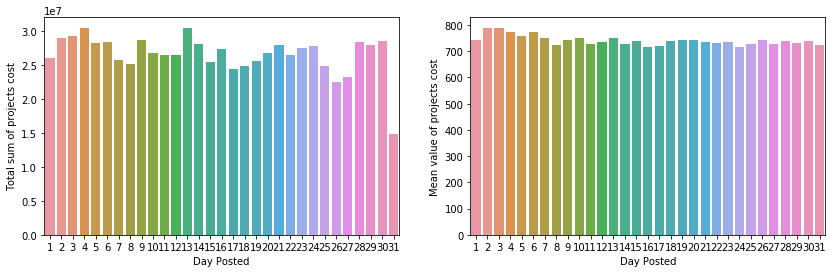

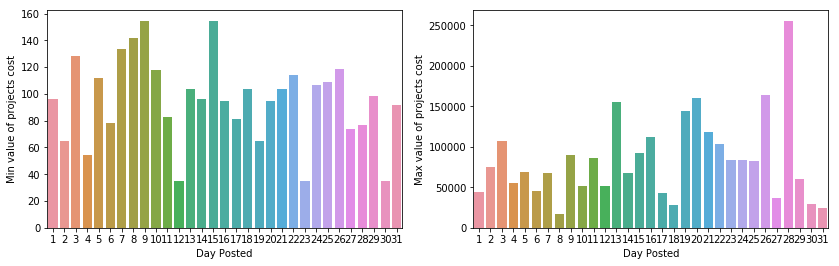

In [55]:
plot_project_time_variation('Day Posted')

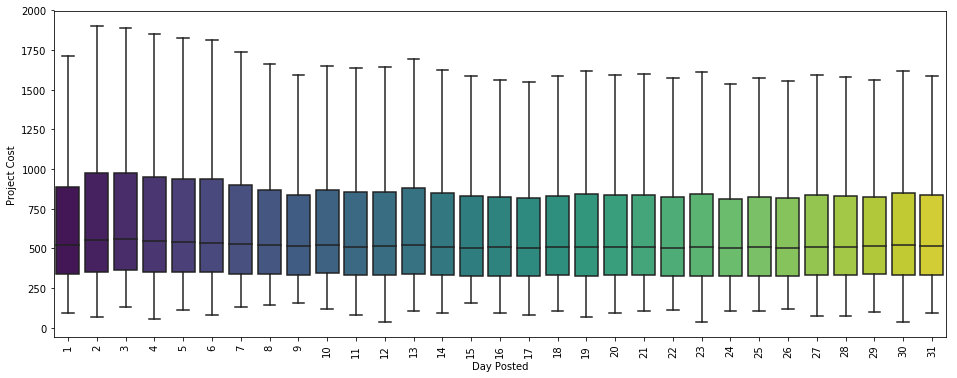

In [56]:
boxplot_project_time_variation('Day Posted')

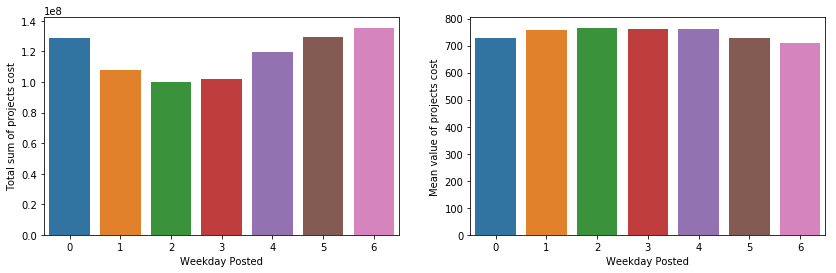

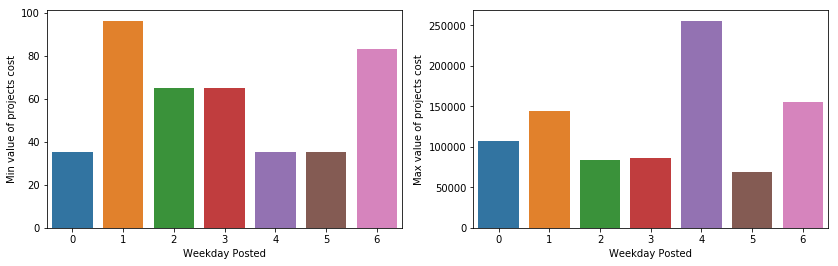

In [57]:
plot_project_time_variation('Weekday Posted')

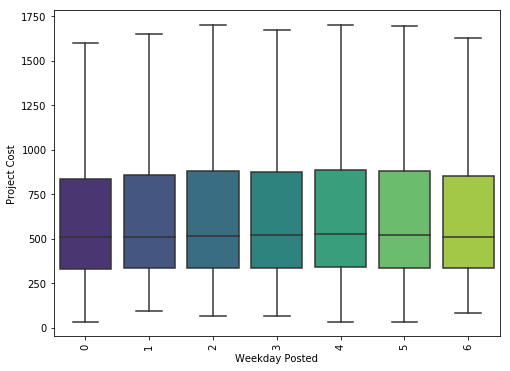

In [58]:
boxplot_project_time_variation('Weekday Posted',4)

Average value of Posted projects costs increased to a maximum value in 2014-2015 (~800 USD) and then slightly decreased. Total sum of Posted projects costs has peaks in March and September. Mean value of projects costs oscilates during a month between 700 and 800 USD. As per Weekdays, there is a valey in total projects cost on Day 2 and a peak for days 6 and 0.

#### Project Fully Funded Date time variation

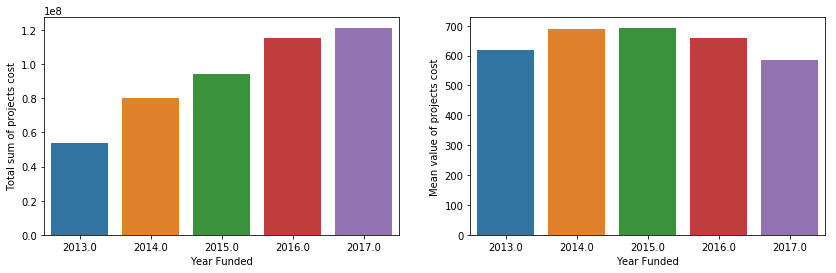

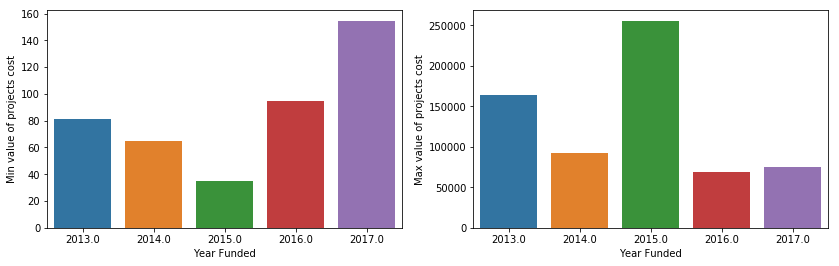

In [59]:
plot_project_time_variation('Year Funded')

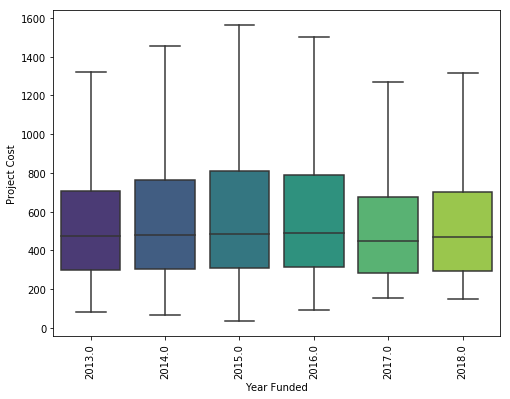

In [60]:
boxplot_project_time_variation('Year Funded',4)

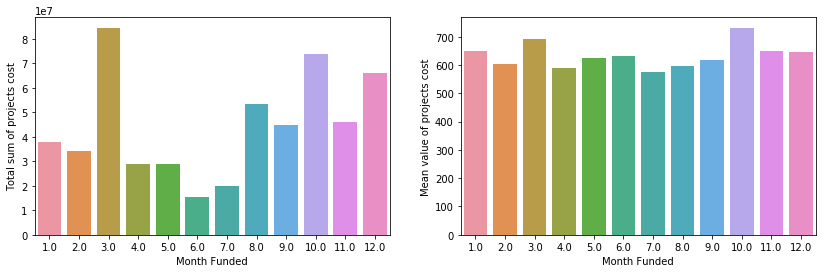

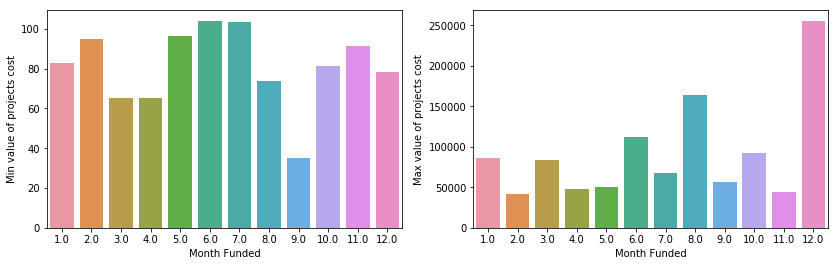

In [61]:
plot_project_time_variation('Month Funded')

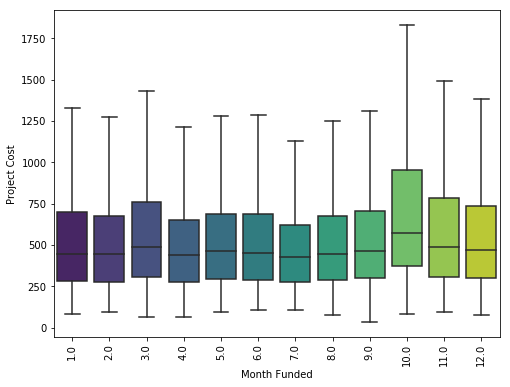

In [62]:
boxplot_project_time_variation('Month Funded',4)

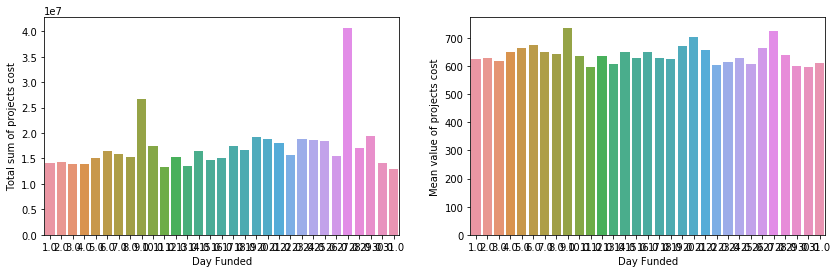

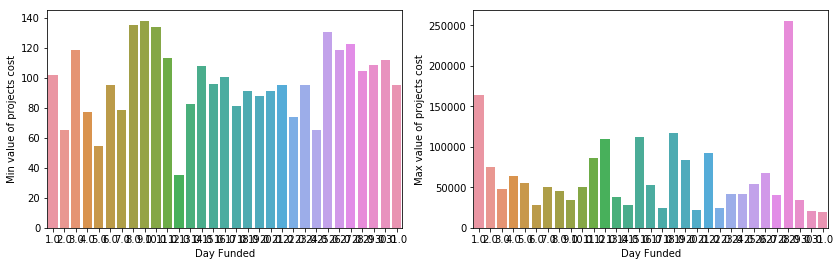

In [63]:
plot_project_time_variation('Day Funded')

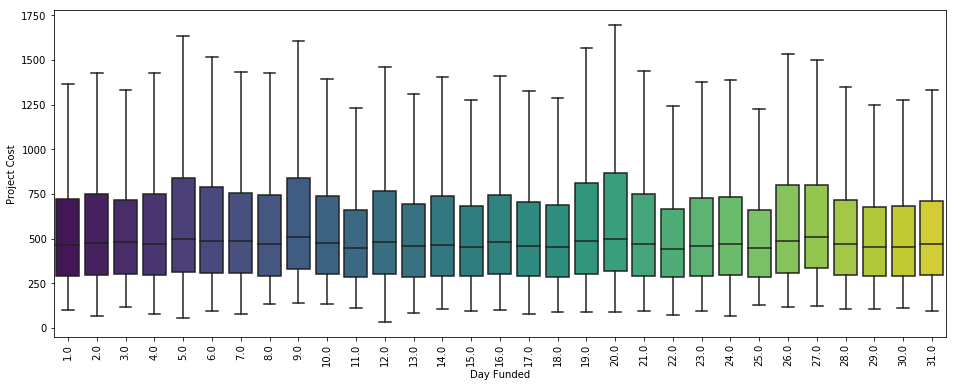

In [64]:
boxplot_project_time_variation('Day Funded')

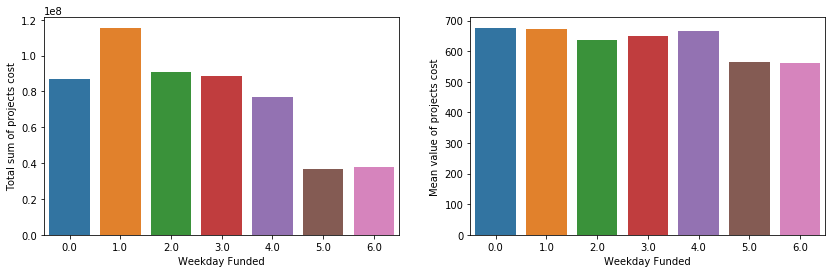

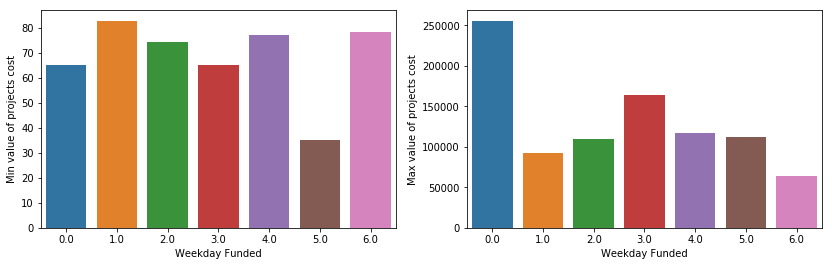

In [65]:
plot_project_time_variation('Weekday Funded')

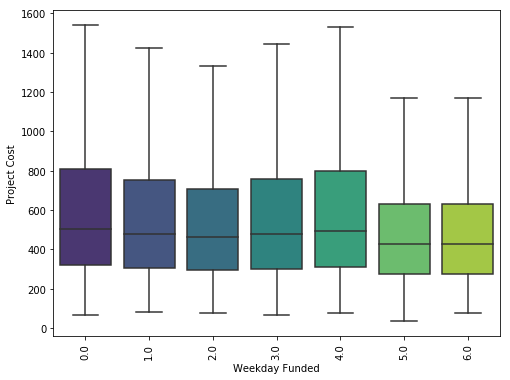

In [66]:
boxplot_project_time_variation('Weekday Funded',4)

The peaks in Total sum of projects costs aggregated per Month Funded have peaks in March and October. The same are for average values of project costs aggregated per Month Funded. Maximum value for sum of Projects costs aggregated by Weekday have a maximum on Day 1 and smallest values on Days 5 and 6.


In [67]:
def plot_project_schools(feature):
    tmp = projects_schools.groupby(feature)['Project Cost'].sum()
    df1 = pd.DataFrame({feature: tmp.index,'Total sum of projects cost': tmp.values})
  
    tmp = projects_schools[feature].value_counts()
    df2 = pd.DataFrame({feature: tmp.index,'Number of projects': tmp.values})
    
    fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))
    sns.barplot(ax = ax1, x = feature, y="Total sum of projects cost",data=df1,order=tmp.index)
    sns.barplot(ax = ax2, x = feature, y="Number of projects",data=df2,order=tmp.index)
    plt.show();
    
def boxplot_project_schools(feature1, feature2, n=2):
    fig, ax1 = plt.subplots(ncols=1, figsize=(n*7,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2,data=projects_schools, palette="viridis",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

### School Metro Type distribution


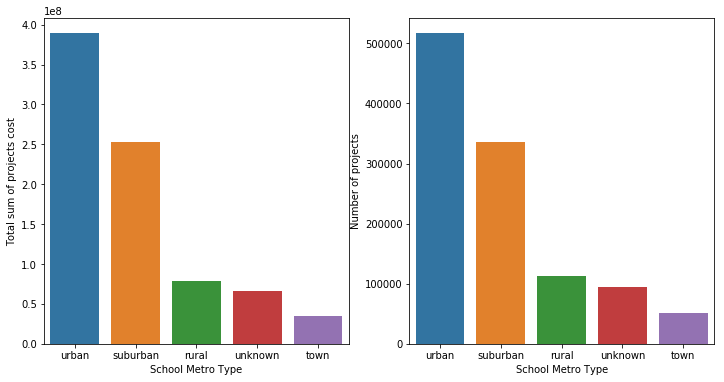

In [68]:
plot_project_schools('School Metro Type')

Most of the projects (500K) and majority of project budgets (380 millions) are from *urban* areas. On the second place are both in terms of number of projects and budget the *suburban* areas, followed by *rural*, *unknown* and *town*.

### School Percentage Free Lunch

Let's represent the *School Percentage Free Lunch* distribution (with boxplot) grouped by *School Metro Type*.

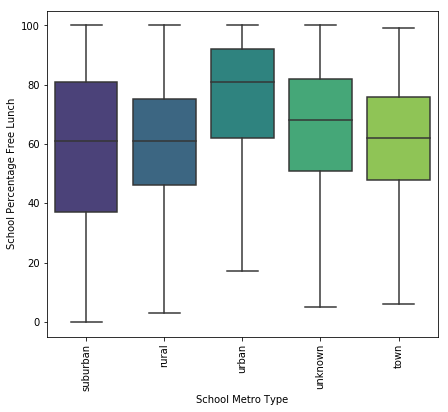

In [69]:
boxplot_project_schools('School Metro Type','School Percentage Free Lunch',1)

While *urban* shows the largest average of *School Percentage Free Lunch* and highest minimum value (~20%), the*suburban* shows tle the smalles minimum (close to 0) and lowest average and highest variability.

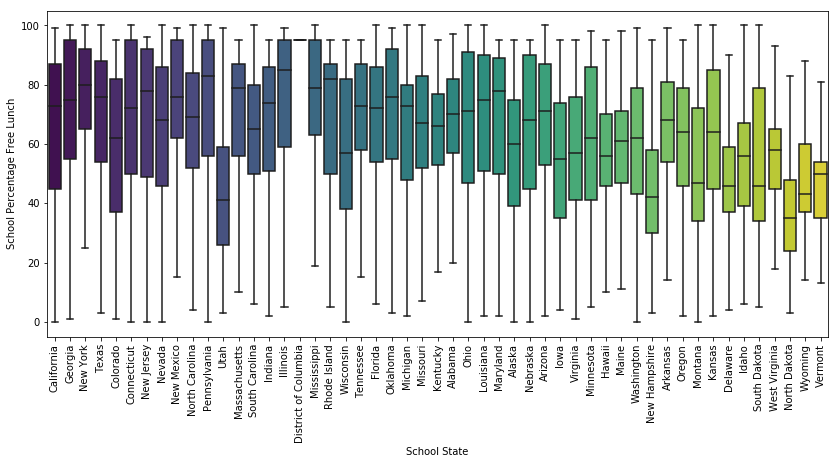

In [70]:
boxplot_project_schools('School State','School Percentage Free Lunch')

Some of the states with lowest budget for projects are also states with lowest *School Percentage Free Lunch* (average, min and max values): *North Dakota*, *Wyoming*, *Vermont*, *Delaware*. *California*, *New York*, *Illinois*, *Georgia*, *Texas*, *Pennsylvania* have higher values for average min and max for *School Percentage Free Lunch*.

## Wordcloud with Project Title 

Let's create a Wordcloud with the words from `Project Title`.

In [71]:
def plot_wordcloud(feature,additionalStopWords=""):
    if(USE_WORDCLOUD):
        stopwords = set(STOPWORDS)
        stopwords.update(additionalStopWords)
        text = " ".join(projects_schools[feature][~pd.isnull(projects_schools[feature])].sample(50000))
        wordcloud = WordCloud(background_color='black',stopwords=stopwords,
                          max_words=1000,max_font_size=100, width=800, height=800,random_state=2018,
                         ).generate(text)
        fig = plt.figure(figsize = (12,12))
        plt.imshow(wordcloud)
    plt.title("Wordcloud with %s content" % feature, fontsize=16)
    plt.axis('off')
    plt.show()

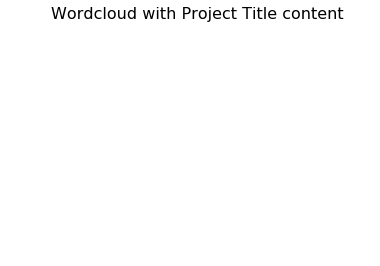

In [72]:
plot_wordcloud('Project Title')

Most important concepts appears to be *Learning*, *Reading*, *Classroom*, *Technology*, *STEM*, *Book*, *iPad*, *Book*.

## Wordcloud with Project Essay 

Let's create a Wordcloud with the words from `Project Essay`.

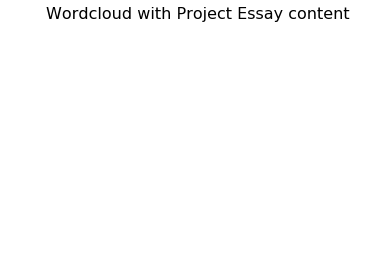

In [73]:
plot_wordcloud('Project Essay',["DONOTREMOVEESSAYDIVIDER", "students", "will"])

Most important concepts appears to be *title*, *school*, *small*, *group*, *well*, *free*, *reduced*, *low*, *income*, *teacher*, *every*, *day*. 

## Wordcloud with Project Short Description 

Let's create a Wordcloud with the words from `Project Short Description`.

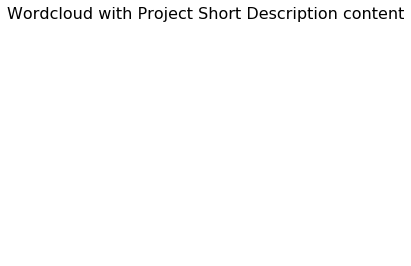

In [74]:
plot_wordcloud('Project Short Description')

## Wordcloud with Project Need Statement 

Let's create a Wordcloud with the words from `Project Need Statement`.

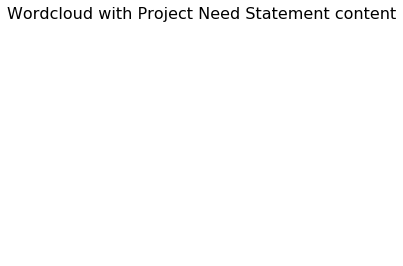

In [75]:
plot_wordcloud('Project Need Statement', ["need"])

Most frequent concepts are *learning*, *iPad*, *skills*, *learning*, *book*, *Chromebook*, *classroom*.

## Project Subject Category Tree

Let's see what are the Project Category Tree. We will represent the first 20 Subject Categories.

In [76]:
def plot_category(feature):
    tmp = projects[feature].value_counts().sort_values(ascending = False).head(20)
    df1 = pd.DataFrame({feature: tmp.index,'Number of projects': tmp.values})
    fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
    s = sns.barplot(ax = ax1, x = feature, y="Number of projects",data=df1)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

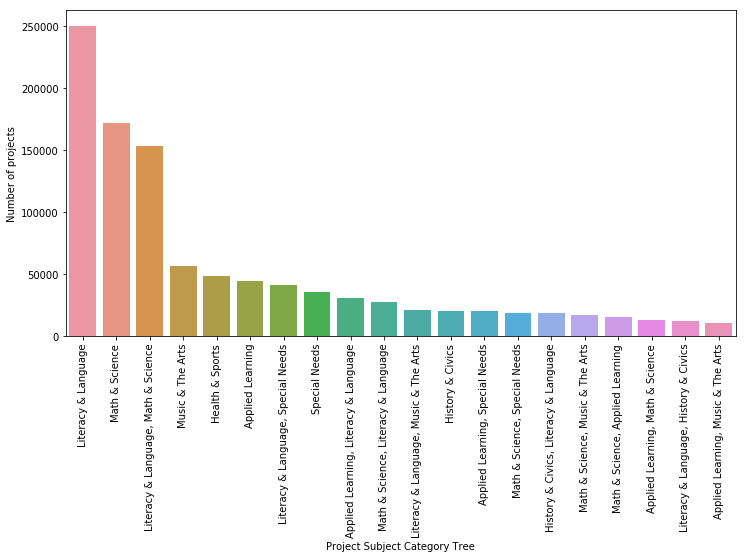

In [77]:
plot_category('Project Subject Category Tree')

The most frequent 3 are *Literacy & Language*, *Math & Science* and *Literacy & Language, Math & Science*.

## Project Subject Subcategory Tree

Let's see what are the first 20 most frequent Project Subcategory Tree.

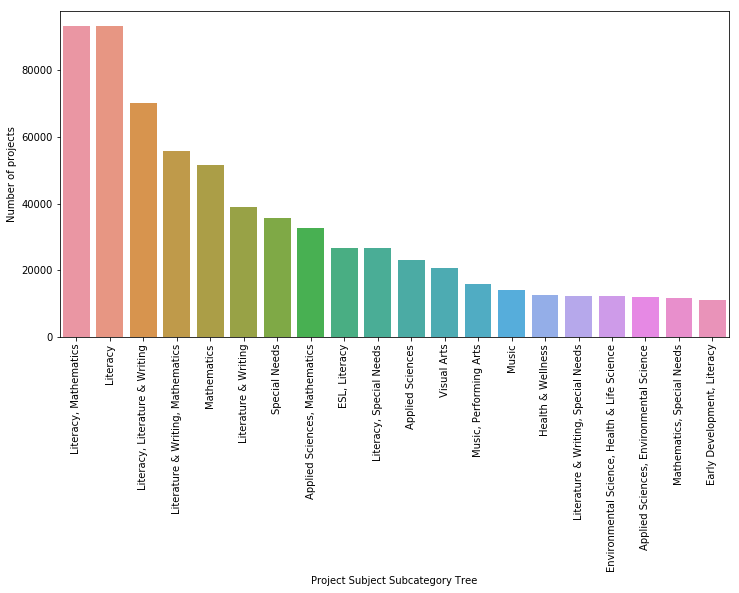

In [78]:
plot_category('Project Subject Subcategory Tree')

The most frequent 3 are *Literacy, Mathematics*, *Literacy*, *Literacy, Literature & Writing*.

## Project Grade Level Category

Let's see what are the most frequent *Project Grade Level Category*.

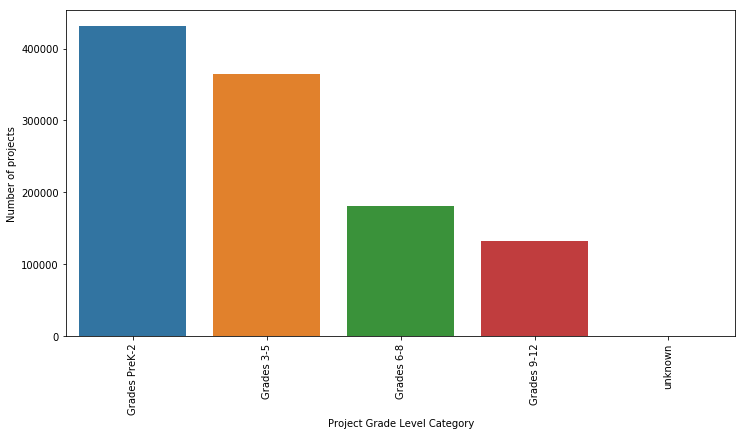

In [79]:
plot_category('Project Grade Level Category')

Most frequent *Project Grade Level Category* are *Grades Prek-2* and *Grades 3-5*.

## Project Resource Category

Let's see what are the first 20 most frequent *Project Resource Category*.

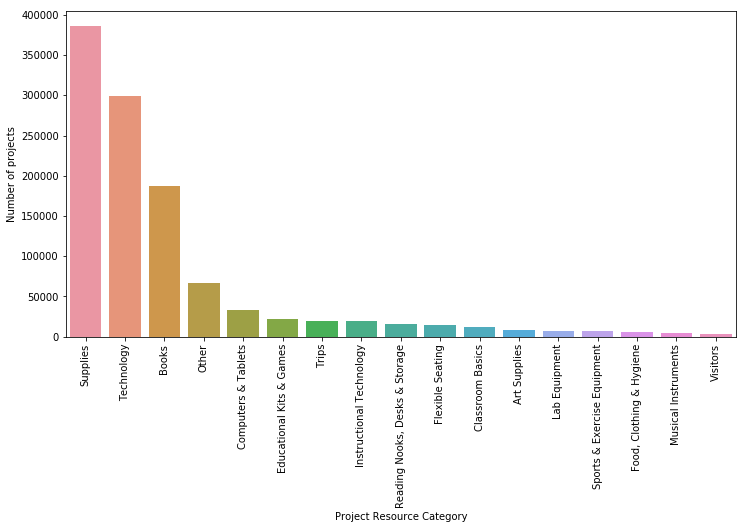

In [80]:
plot_category('Project Resource Category')

The most frequent three *Project Resource Category* are *Supplies*, *Technology* and *Books*.

<a href="#0"><font size="1">Go to top</font></a>

## <a id="54">Resources</a>

Let's check which *Resource Vendor Name* are most frequent used in projects, have most of the orders, sels the most number of items (resources) and sels for the largest sum of money. We will only look to the top 20.

We start with the total number of orders.

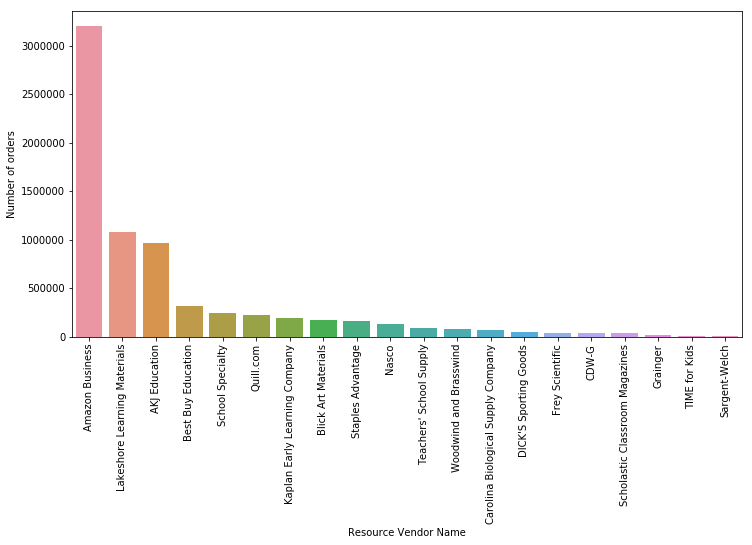

In [81]:
tmp = resources['Resource Vendor Name'].value_counts().head(20)
df1 = pd.DataFrame({'Resource Vendor Name': tmp.index,'Number of orders': tmp.values})
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.barplot(ax = ax1, x = 'Resource Vendor Name', y="Number of orders",data=df1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

The first vendors in terms of number of orders are *Amazon Business*  (with over 3 millions orders), *Lakeshore Learning Materials*, *AKJ Education*, *Best Buy Education* and *School Specialty*.

Let's see now what vendors have the largest number of items ordered.

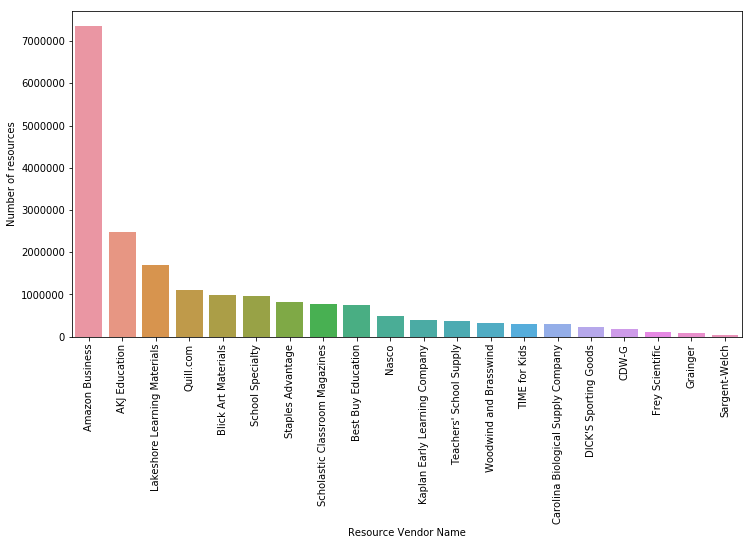

In [82]:
tmp = resources.groupby('Resource Vendor Name')['Resource Quantity'].sum().sort_values(ascending = False).head(20)
df1 = pd.DataFrame({'Resource Vendor Name': tmp.index,'Number of resources': tmp.values})
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.barplot(ax = ax1, x = 'Resource Vendor Name', y="Number of resources",data=df1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

The first vendors in terms of total number of items ordered are *Amazon Business* (with over 7 millions items ordered), *AKJ Education*, *Lakeshore Learning Materials*, *Quill.com* and *Bilk Art Materials*.

Let's see now what vendors have the largest amount of money ordered.

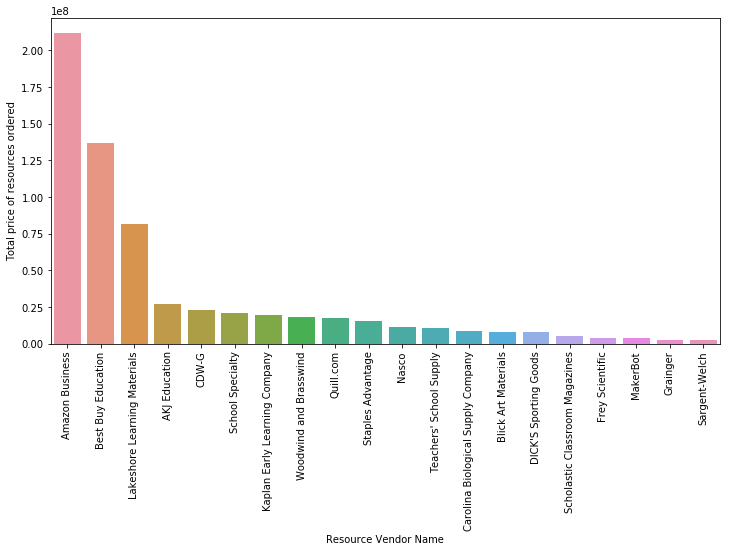

In [83]:
resources['Resource Price'] = resources['Resource Quantity'] * resources['Resource Unit Price']
tmp = resources.groupby('Resource Vendor Name')['Resource Price'].sum().sort_values(ascending = False).head(20)
df1 = pd.DataFrame({'Resource Vendor Name': tmp.index,'Total price of resources ordered': tmp.values})
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
s = sns.barplot(ax = ax1, x = 'Resource Vendor Name', y="Total price of resources ordered",data=df1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

The first vendors in terms of total price of orders are *Amazon Business* (with over 200 millions USDd), *Best Buy Education*, *Lakeshore Learning Materials*, *AKJ Education* and *CDW-G*.

## <a id="55">Teachers</a>

Let's check the distribution of *Teacher Prefix* (this is the preffix used for the teacher name, ex: Dr., Mr., Ms., Mrs.).

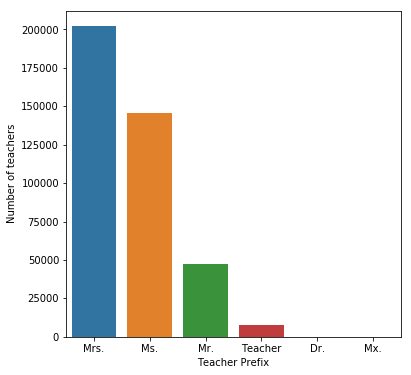

In [84]:
tmp = teachers['Teacher Prefix'].value_counts()
df1 = pd.DataFrame({'Teacher Prefix': tmp.index,'Number of teachers': tmp.values})
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,6))
s = sns.barplot(ax = ax1, x = 'Teacher Prefix', y="Number of teachers",data=df1)
plt.show();

The majority of the teachers have a prefix that is associated with female gender (200K *Mrs.*, ~150K *Ms.*). *Mr.* are less than 50K. It is not clear if this shows the real distribution of the teacher's population genders in US or this is representative for the teachers reaching out for *DonnorsChoose.org*. Only very small numbers are, comparativelly, teachers with title of *Dr.* or *Mx.*.

Let's check the distribution in time of the *Teacher First Project Posted Date*.

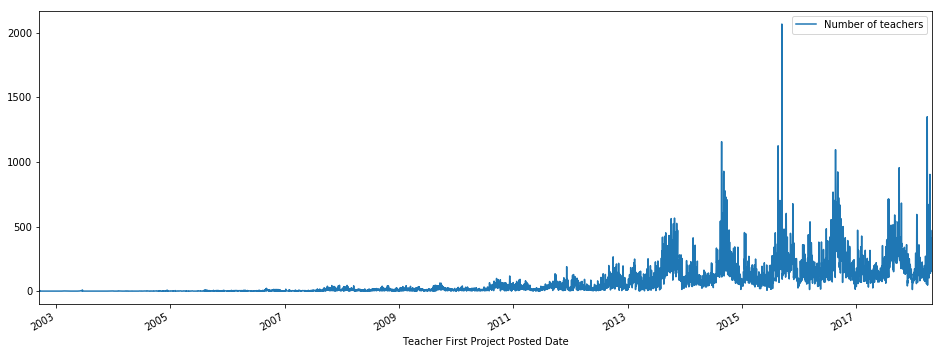

In [85]:
teachers['Teacher First Project Posted Date'] = pd.to_datetime(teachers['Teacher First Project Posted Date'])
tmp = teachers['Teacher First Project Posted Date'].value_counts()
df1 = pd.DataFrame({'Teacher First Project Posted Date': tmp.index,'Number of teachers': tmp.values})
fig, (ax1) = plt.subplots(ncols=1, figsize=(16,6))
df1.plot(ax=ax1,x = 'Teacher First Project Posted Date', y="Number of teachers")
plt.show();

<a href="#0"><font size="1">Go to top</font></a>

We can observe that most of the teachers filled first time projects in the last years, for which also we have the current data (2013-2017). This is of course due to the increasing trend of the *DonorChoose* activity in the last years. We also can notice a certain seasonality for first time filling a project, with higher peaks for certain months each year.

# <a id="6">Data engineering and advanced analysis</a>

##  <a id='61'>Project Founding Duration</a>

Let's calculate the project founding duration.  We  will represent the new feature in relation with several other significat features.

In [86]:
import datetime
projects_schools['Project Funding Duration'] = (pd.to_datetime(projects_schools['Project Fully Funded Date'] -\
                    projects_schools['Project Posted Date']) - pd.to_datetime('1970-01-01')).dt.days

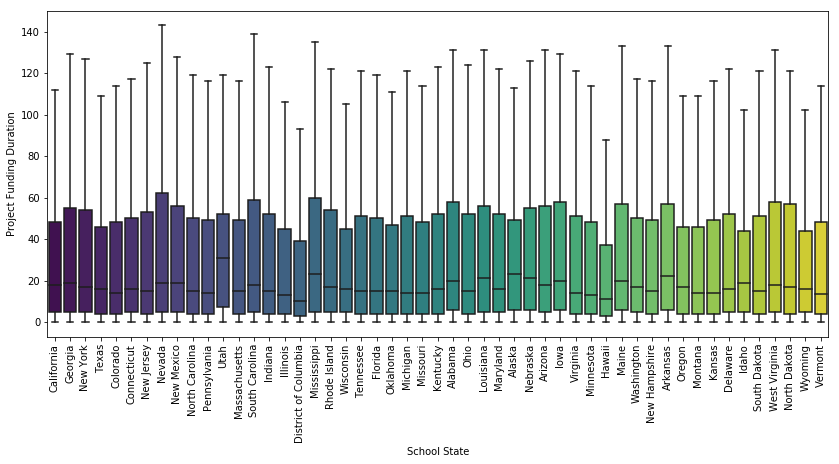

In [87]:
boxplot_project_schools('School State','Project Funding Duration')

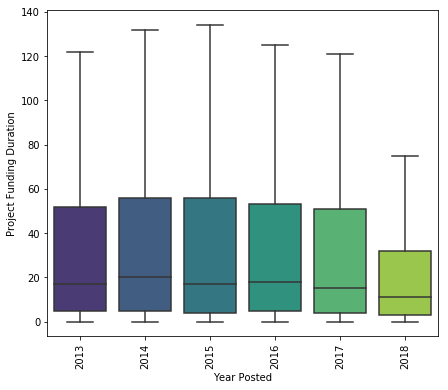

In [88]:
boxplot_project_schools('Year Posted','Project Funding Duration',n=1)

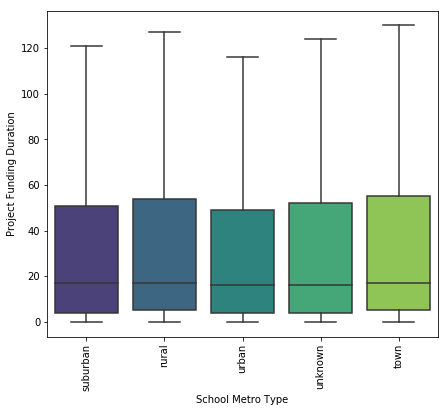

In [89]:
boxplot_project_schools('School Metro Type','Project Funding Duration',n=1)

## <a id='62'>Projects and donations relationship</a>

Let's merge Project, School, Donations and Donors data first.

In [90]:
donations_donors_projects_schools = donations_donors.merge(projects_schools, on='Project ID', how='inner')

Let's calculate the duration (in days) until a donation is done (starting from the moment the project is posted).

In [91]:
donations_donors_projects_schools['Project Donation Duration'] = (pd.to_datetime(donations_donors_projects_schools['Donation Received Date'] -\
                    donations_donors_projects_schools['Project Posted Date']) - pd.to_datetime('1970-01-01')).dt.days

Let's investigate some of the features.   


### Donations from a state to another state

Let's visualize on a single graph the donations amount from a state to another state.

In [92]:
tmp = np.log(donations_donors_projects_schools.groupby(['Donor State', 'School State'])['Donation Amount'].sum())
df1 = tmp.reset_index()
matrix = df1.pivot('Donor State', 'School State','Donation Amount')

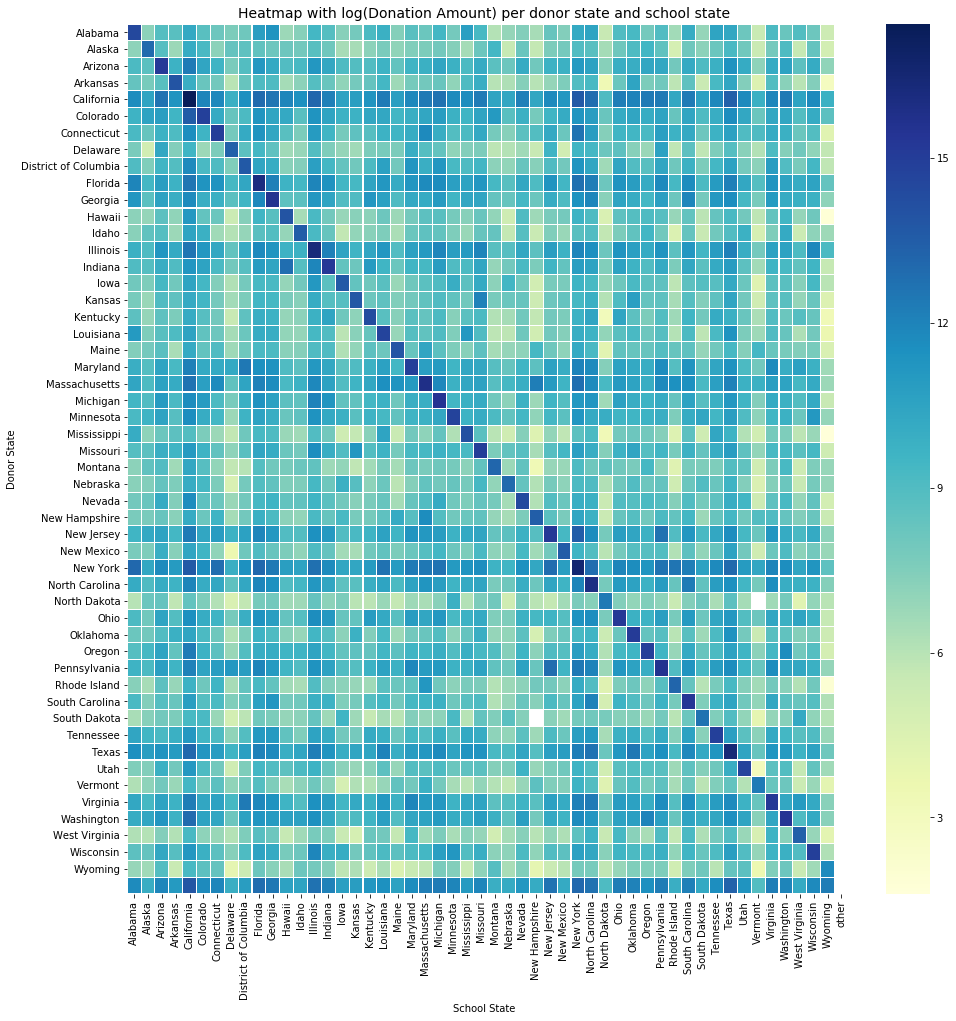

In [93]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(16,16))
sns.heatmap(matrix, 
        xticklabels=matrix.index,
        yticklabels=matrix.columns,ax=ax1,linewidths=.1,cmap="YlGnBu")
plt.title("Heatmap with log(Donation Amount) per donor state and school state", fontsize=14)
plt.show()

We can observe that the states that obtain the largest donations are donating as well significant amounts outside their borders.

### Funding duration per Project Resource Category and School Metro Type

Let's represent the mean value for Project Funding Duration in a heatmap with dimmensions Project Resource Category and School Metro Type.

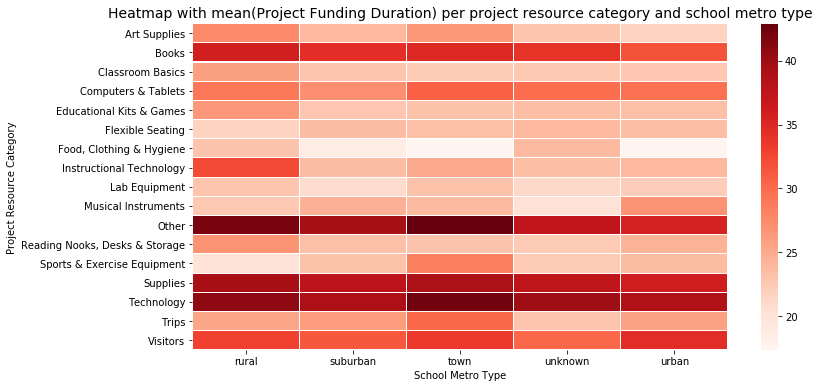

In [94]:
tmp = donations_donors_projects_schools.groupby(['Project Resource Category', 'School Metro Type'])['Project Funding Duration'].mean()
df1 = tmp.reset_index()
matrix = df1.pivot('Project Resource Category', 'School Metro Type','Project Funding Duration')
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,6))
sns.heatmap(matrix, 
        xticklabels=matrix.columns,
        yticklabels=matrix.index,ax=ax1,linewidths=.1,cmap="Reds")
plt.title("Heatmap with mean(Project Funding Duration) per project resource category and school metro type", fontsize=14)
plt.show()

Mean duration for project funding is smallest for *Food, Clothing & Hygiene* (especially in town, suburban and urban areas), *Flexible Seating*, *Lab Equipment*, *Classroom Basics*, *Reading Nooks, Desks & Storage* and highest for *Other* (especially in rural and town), *Technology* (especially in rural and town), *Books* (overall) and *Visitors*.

### Funding duration per Project Day Posted and Project Day Funded

Let's represent the Funding duration histogram per Project Day Posted and Project Day Funded.

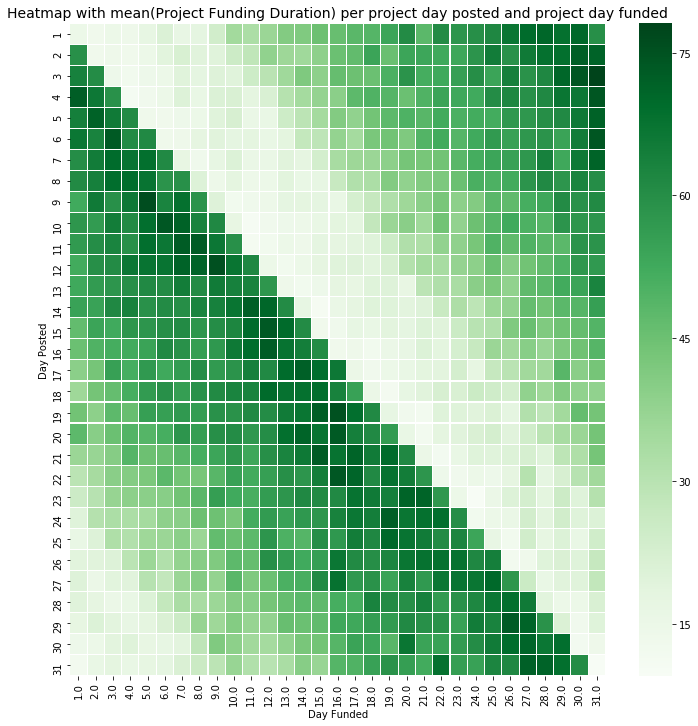

In [99]:
tmp = donations_donors_projects_schools.groupby(['Day Posted', 'Day Funded'])['Project Funding Duration'].mean()
df1 = tmp.reset_index()
matrix = df1.pivot('Day Posted', 'Day Funded','Project Funding Duration')
fig, (ax1) = plt.subplots(ncols=1, figsize=(12,12))
sns.heatmap(matrix, 
        xticklabels=matrix.columns,
        yticklabels=matrix.index,ax=ax1,linewidths=.1,cmap="Greens")
plt.title("Heatmap with mean(Project Funding Duration) per project day posted and project day funded", fontsize=14)
plt.show()

There is an interesting pattern  when we plot the heatmap of Project Funding Duration as a function of Day Posted and Day Founded. The regularity shown indicates that a project founded in a certain day will most probably have a Project Funding Duration larger if the Day Funded is larger. As well, a project with Day Posted on 23, for example, will have the least value for Project Funding Duration for Day Funded 23 and will gradually increase with the day (including also the month day "rotation") so that for Day Founded 1 Project Funding Duration will be a bit larger than for day 31, in this second example.

### Correlation between numerical features

Let's see the correlation between *Project Funding Duration*, *Project Cost*, *Project Donation Duration*, *Donation Amount* and *School Percentage Free Lunch*.

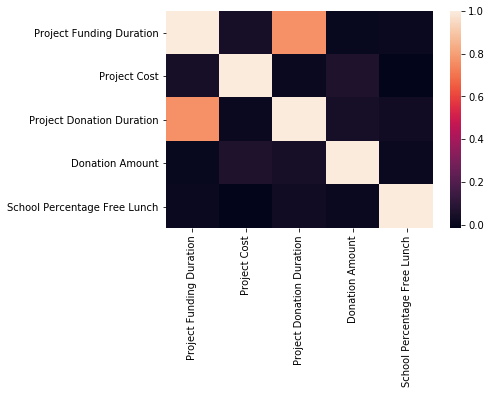

In [94]:
tmp = donations_donors_projects_schools[['Project Funding Duration', 'Project Cost', 'Project Donation Duration',\
                                         'Donation Amount', 'School Percentage Free Lunch']].copy()
corr = tmp.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

Most of these numerical features are very low correlated or uncorrelated. The only significant correlation is between Project Donation Duration and Project Funding Duration.

<a href="#0"><font size="1">Go to top</font></a>

# <a id="7">Feedback</a>

This Kernel is under construction. I would very much appreciate your suggestions for improvement.

# <a id="8">References</a>

[1] DonorsChoose.org official homepage, https://www.donorschoose.org/  
[2] DonorsChoose Wikipedia page, https://en.wikipedia.org/wiki/DonorsChoose  


<a href="#0"><font size="1">Go to top</font></a>